In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Data Preparation / Cleaning
- EDA
- Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)
- Create model for analysis (Classification). Use XGBoost, K-Nearest Neighbor, Logistic Regression, Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, Random Forest.
- Create short conclusion about the modeling results


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df = df.drop_duplicates()

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


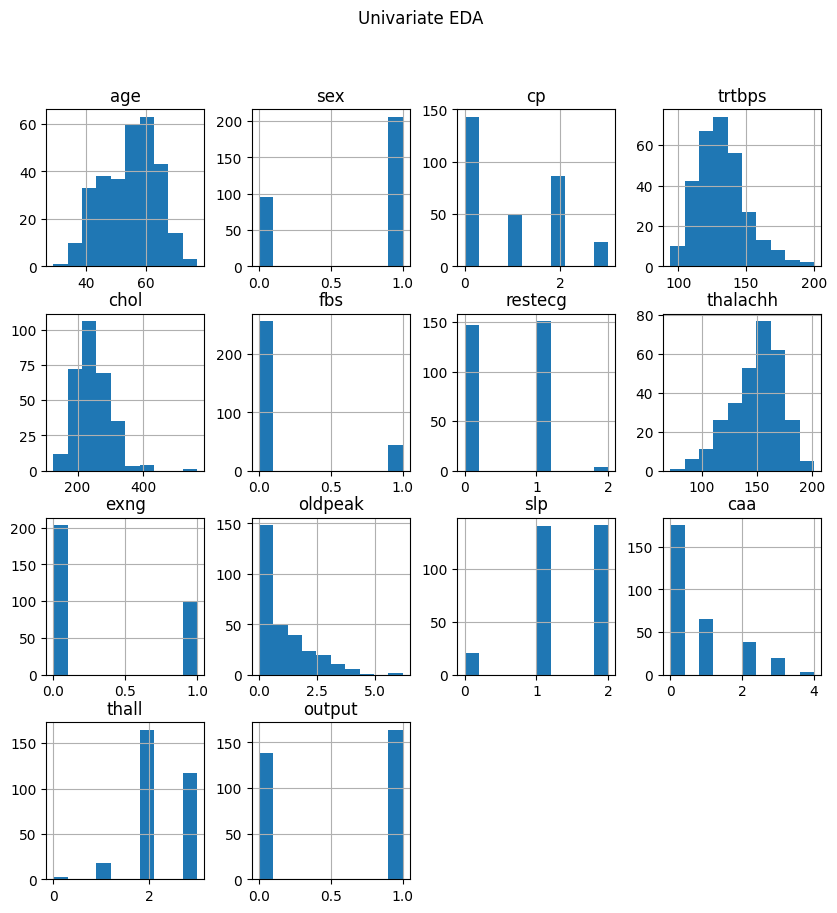

In [7]:
df.hist(figsize=(10,10))
plt.suptitle("Univariate EDA")
plt.show()

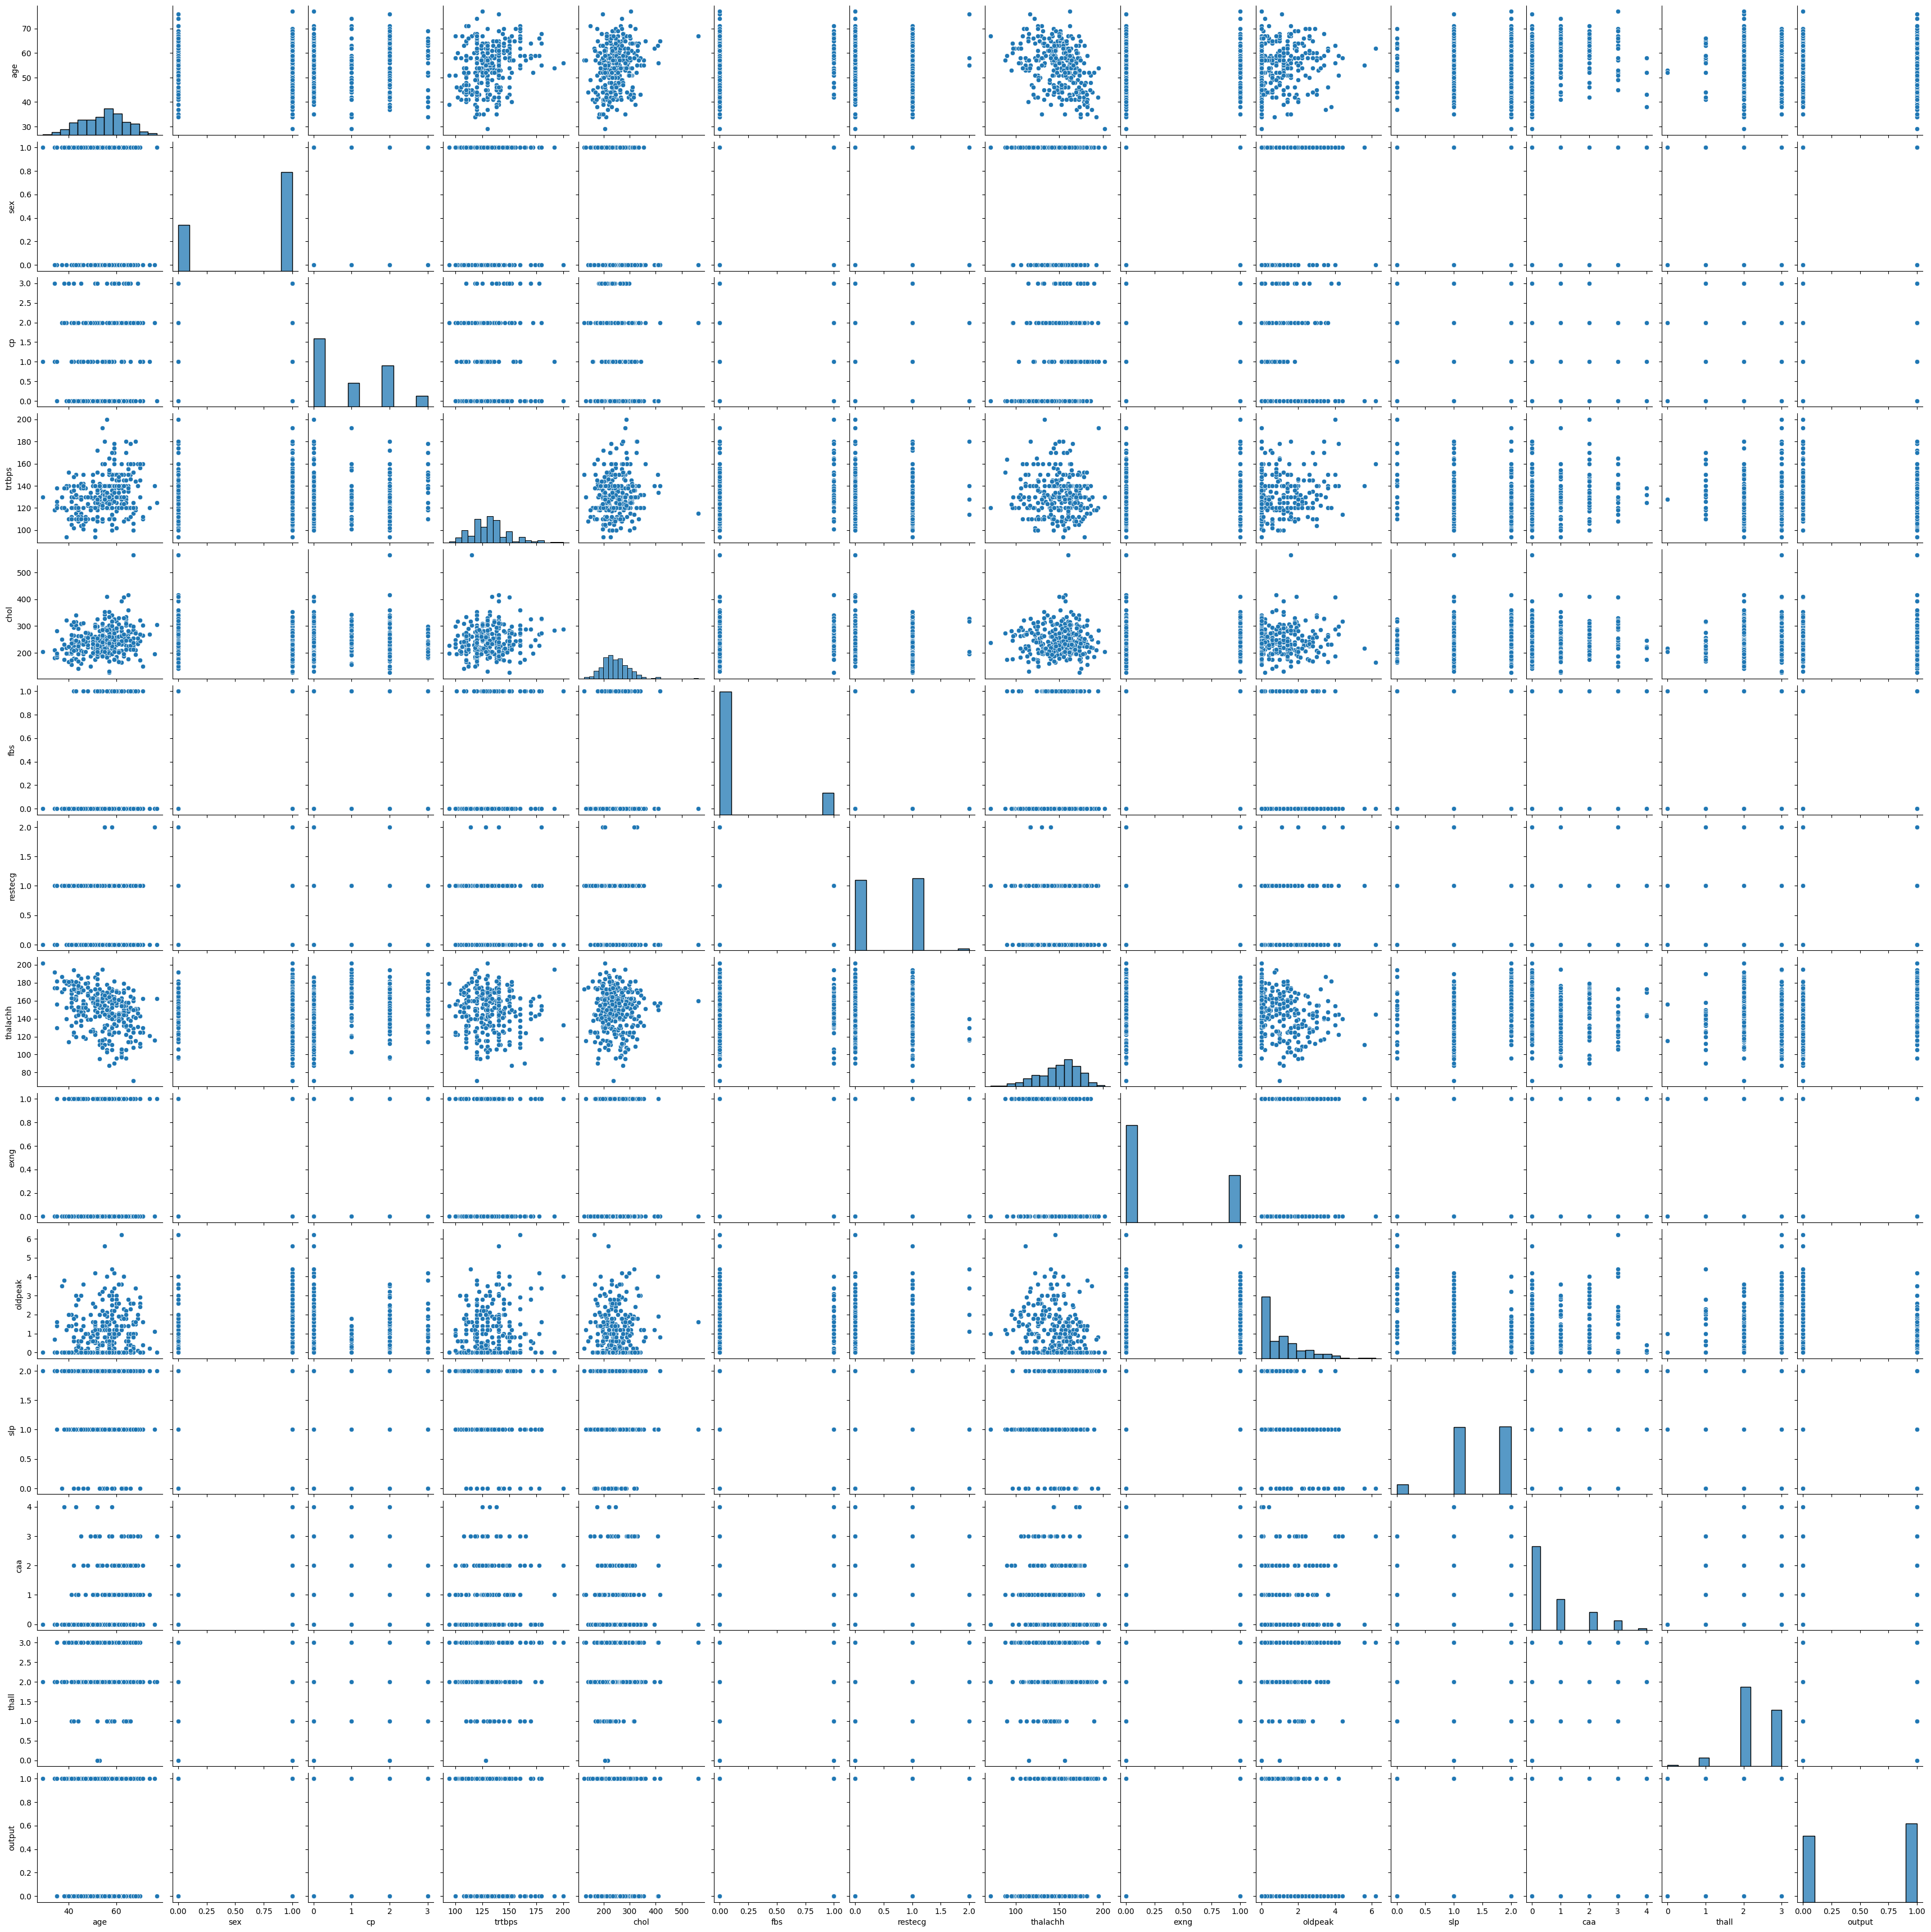

In [8]:
sns.pairplot(data=df)
plt.show()

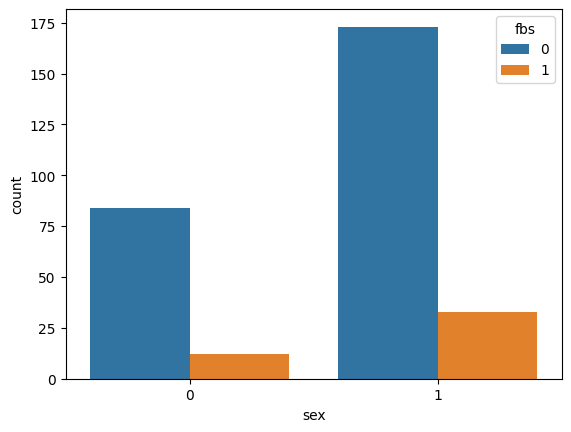

In [10]:
sns.countplot(data=df, x="sex",hue="fbs")
plt.show()

^
The plot show the distribution of fbs for each gender. To see the number of people for each gender that have fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

The information indicates that more people with gender '0' have high fasting blood sugar compared to those with gender '1'. Also, there are more individuals identified as gender '0' than '1'.

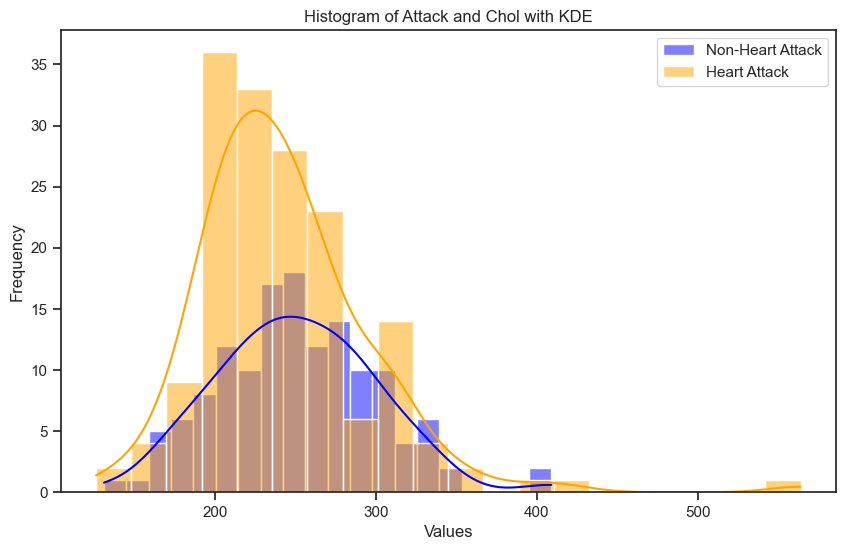

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your heart dataset DataFrame
plt.figure(figsize=(10, 6))

# Create histograms for two variables
sns.histplot(df[df['output'] == 0]['chol'], bins=20, kde=True, color='blue', label='Non-Heart Attack')
sns.histplot(df[df['output'] == 1]['chol'], bins=20, kde=True, color='orange', label='Heart Attack')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Attack and Chol with KDE')

# Add a legend
plt.legend()

# Show the plot
plt.show()


- Output: 0= less chance of heart attack 1= more chance of heart attack
- chol : cholestoral in mg/dl fetched via BMI sensor

Orang yang tidak mengalami serangan jantung memiliki jumlah cholestrol yg lebih rendah dibandingkan yang mengalami serangan jantung. Dan majority yang terkena serangan jantung memiliki angka cholestrol diatas 200.

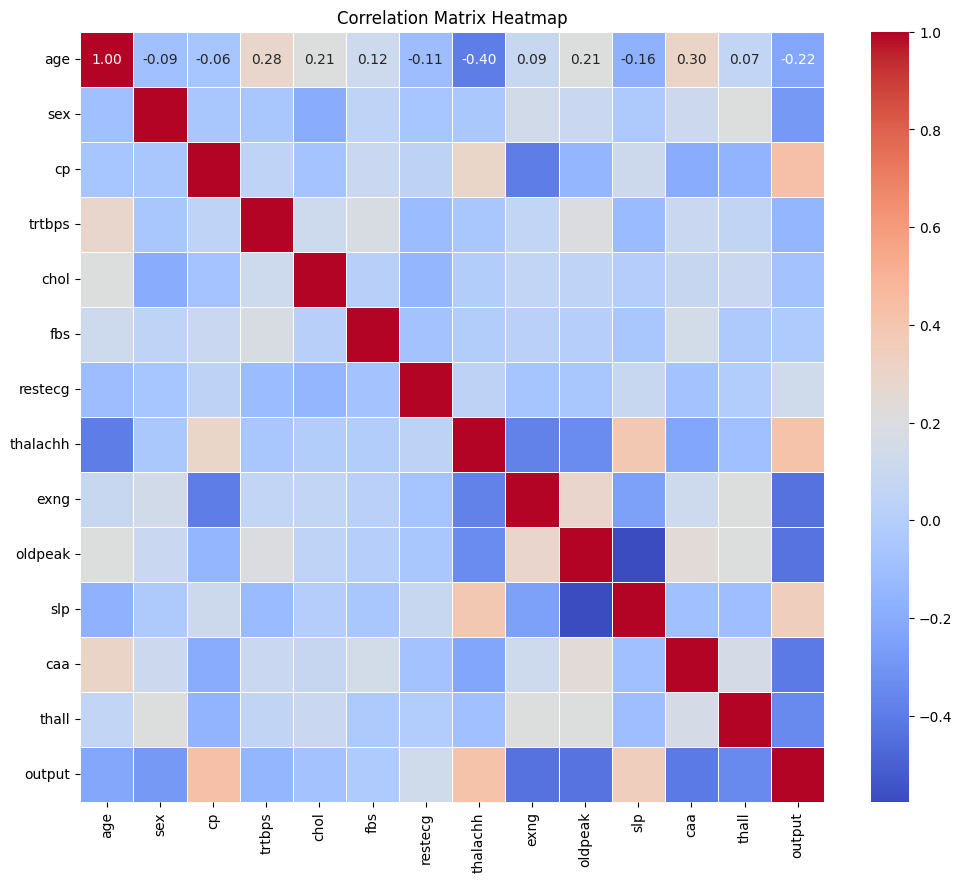

In [13]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
X = df.drop('output', axis=1)
y = df['output']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize the features (important for some algorithms like SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8360655737704918
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [21]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Accuracy:", accuracy_knn)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.9180327868852459
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [22]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", accuracy_lr)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8360655737704918
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [23]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("\nGaussian Naive Bayes Accuracy:", accuracy_gnb)
print("Classification Report (Gaussian NB):\n", classification_report(y_test, y_pred_gnb))


Gaussian Naive Bayes Accuracy: 0.8852459016393442
Classification Report (Gaussian NB):
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [24]:
# Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred_bnb = bnb_model.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes Accuracy:", accuracy_bnb)
print("Classification Report (Bernoulli NB):\n", classification_report(y_test, y_pred_bnb))


Bernoulli Naive Bayes Accuracy: 0.8688524590163934
Classification Report (Bernoulli NB):
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [25]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSupport Vector Machine Accuracy:", accuracy_svm)
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Support Vector Machine Accuracy: 0.8688524590163934
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [27]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8688524590163934
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Certainly, let's rephrase the explanation for the results of each model:

1. **XGBoost:**
   - **Accuracy:** Indicates the overall correctness of the XGBoost model on the test set.
   - **Classification Report:** Provides detailed metrics such as precision, recall, and F1-score for both classes (0 and 1).

2. **K-Nearest Neighbors (KNN):**
   - **Accuracy:** Measures the overall correctness of the KNN model on the test set.
   - **Classification Report:** Offers precision, recall, and F1-score metrics for each class.

3. **Logistic Regression:**
   - **Accuracy:** Represents the overall correctness of the Logistic Regression model on the test set.
   - **Classification Report:** Includes precision, recall, and F1-score for both classes.

4. **Gaussian Naive Bayes:**
   - **Accuracy:** Reflects the overall correctness of the Gaussian Naive Bayes model on the test set.
   - **Classification Report:** Provides precision, recall, and F1-score metrics for each class.

5. **Bernoulli Naive Bayes:**
   - **Accuracy:** Indicates the overall correctness of the Bernoulli Naive Bayes model on the test set.
   - **Classification Report:** Includes precision, recall, and F1-score for both classes.

6. **Support Vector Machine (SVM):**
   - **Accuracy:** Measures the overall correctness of the SVM model on the test set.
   - **Classification Report:** Offers precision, recall, and F1-score metrics for both classes.

7. **Random Forest:**
   - **Accuracy:** Represents the overall correctness of the Random Forest model on the test set.
   - **Classification Report:** Provides precision, recall, and F1-score metrics for each class.

In evaluating each model, it's crucial to consider both accuracy and the classification report to gain a comprehensive understanding of their performance. Metrics like precision, recall, and F1-score become especially valuable when dealing with imbalanced class distributions, helping assess the model's effectiveness for each individual class.